<a href="https://colab.research.google.com/github/kodikarthik21/CS6910---Fundamentals-of-Deep-Learning/blob/main/Assigment02/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wandb

     |████████████████████████████████| 2.1MB 18.1MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 133kB 54.9MB/s 
     |████████████████████████████████| 163kB 52.5MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=de996e0af3ce8b003e17023209095cb2db6fbaf1156986a0bbf30b46e3584112
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=6b78bad0e92298d6c75855f4350a29a3838b8b34f942b71a9cc7521407872524
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!unzip '/content/drive/MyDrive/nature_12K'

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

#Question 1 (5 Marks)



Build a small CNN model consisting of  5 convolution layers. Each convolution layer would be followed by a ReLU activation and a max pooling layer. Here is sample code for building one such conv-relu-maxpool block in keras. 

After 5 such conv-relu-maxpool blocks of  layers you should have one dense layer followed by the output layer containing 10 neurons (1 for each of the 10 classes). The input layer should be compatible with the images in the iNaturalist dataset.






In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing
from wandb.keras import WandbCallback
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/inaturalist_12K/train', 
                                                                    validation_split=0.1, seed = 123, subset = "training")

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/inaturalist_12K/train', 
                                                                    validation_split=0.1, seed = 123, subset = "validation")

Found 9999 files belonging to 10 classes.
Using 9000 files for training.
Found 9999 files belonging to 10 classes.
Using 999 files for validation.


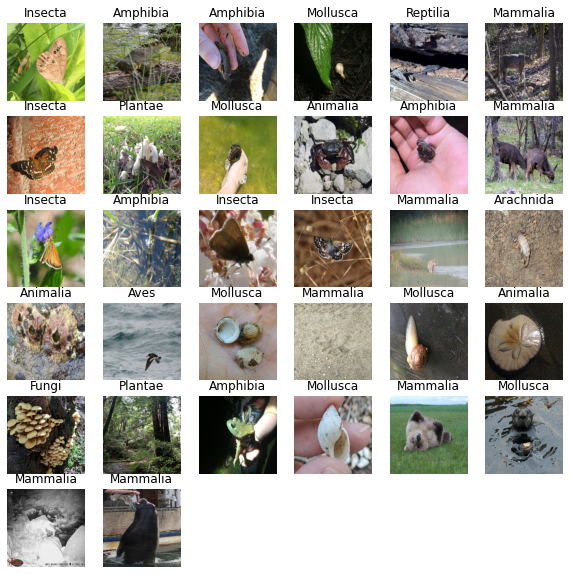

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
def sweep_fn(): 
#---------DEFAULT HYPERPARAMETERS-----------------------------------------------
  hyperparameter_defaults = dict(
        max_epoch = 10,
        num_filters = 32,
        filter_org = 'same',
        data_augmentation = 'Y',
        dropout = 0.2,
        batch_normalization = 'Y',
        optimizer = 'adam'
      )
  
#----------------SETTING UP WANDB-----------------------------------------------
  wandb.init(project="Assignment02", config=hyperparameter_defaults)
  config = wandb.config
  wandb.run.name = "{}_epoch_{}_filt_{}_FiltOrg_{}_DataAug_{}_dropout_{}_bn_{}_opt".format(config.max_epoch, config.num_filters,config.filter_org, config.data_augmentation, config.dropout, config.batch_normalization, config.optimizer)

#-------------------OPTIMIZERS--------------------------------------------------
  learning_rate = 1e-3
  decay_rate = learning_rate / config.max_epoch
  momentum = 0.8
  if config.optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate, decay=decay_rate)
  elif config.optimizer == 'nadam':
    optimizer = tf.keras.optimizers.Nadam(lr=learning_rate, decay=decay_rate)
  elif config.optimizer == 'rmsprop':
    optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate, decay=decay_rate)
  elif config.optimizer == 'nag':
    optimizer = tf.keras.optimizers.SGD(lr=learning_rate, decay=decay_rate, nesterov=True)

#-------------------DATA AUGMENTATION-------------------------------------------
  IMG_SIZE = 256

  data_aug = tf.keras.Sequential([preprocessing.RandomFlip(),
                                  preprocessing.RandomCrop(IMG_SIZE, IMG_SIZE),
                                  preprocessing.RandomRotation(factor = (-0.2, 0.2)),
                                  preprocessing.RandomTranslation(height_factor=(-0.2, 0.2), 
                                                                  width_factor=(-0.2,0.2)),
                                ])

#-------------------MODEL FRAMEWORK---------------------------------------------
  nf = config.num_filters

  model = Sequential()

  if config.data_augmentation == "Y":
    model = Sequential([data_aug])
  elif config.data_augmentation == "N":
    model = Sequential()

  model.add(Conv2D(nf, (3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  for i in range(1,5):
    if config.filter_org == 'double':
      nf = nf*2
    elif config.filter_org == 'half':
      nf = nf/2
    model.add(Conv2D(nf, (3, 3)))
    model.add(Activation('relu'))
    if config.batch_normalization == 'Y':
      model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Dropout(config.dropout))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))
 
#------------MODEL COMPILATION AND RUNNING--------------------------------------
  model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
  model.fit(train_dataset, validation_data = validation_dataset, batch_size = 32, epochs = config.max_epoch, callbacks=[WandbCallback()] )
  model.summary()   
  wandb.run.finish()

In [ ]:
import wandb

sweep_config = {
  "name": "My Sweep",
  "method": "random",
  "project": "Assignment02",
  "metric":{
      "name":"val_accuracy",
      "goal":"maximize"
  },
  "parameters": {
        "max_epoch": {
            "values": [10,20]
        },
        "num_filters": {
            "values":[16,32,64]
        }, 
        "filter_org": {
            "values":['same','double','half']
        },
        "data_augmentation":{
            "values":['Y',"N"]
        },
        "dropout":{
            "values":[0, 0.2,0.3,0.4]
        },
        "batch_normalization": {
            "values":['Y',"N"]
        },  
        "optimizer": {
            "values":['adam', 'nadam','rmsprop','nag']
        }
    }
}

sweep_id = wandb.sweep(sweep_config)

Create sweep with ID: t3p4tkz4
Sweep URL: https://wandb.ai/kodikarthik21/uncategorized/sweeps/t3p4tkz4


In [ ]:
wandb.agent('p1qnuabq', function=sweep_fn)

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: j4u9iddj with config:
wandb: 	batch_normalization: True
wandb: 	data_augmentation: True
wandb: 	dropout: 0
wandb: 	filter_org: half
wandb: 	max_epoch: 10
wandb: 	num_filters: 64
wandb: 	optimizer: rmsprop
wandb: Currently logged in as: kodikarthik21 (use `wandb login --relogin` to force relogin)
wandb: WARNING Ignored wandb.init() arg project when running a sweep


Epoch 1/10
282/282 [==============================] - 146s 398ms/step - loss: 2.9245 - accuracy: 0.0984 - val_loss: 2.3005 - val_accuracy: 0.0981
Epoch 2/10
282/282 [==============================] - 88s 307ms/step - loss: 2.3150 - accuracy: 0.1004 - val_loss: 2.3107 - val_accuracy: 0.0961
Epoch 3/10
282/282 [==============================] - 88s 305ms/step - loss: 2.3211 - accuracy: 0.1132 - val_loss: 2.3064 - val_accuracy: 0.1031
Epoch 4/10
282/282 [==============================] - 88s 305ms/step - loss: 2.3008 - accuracy: 0.1119 - val_loss: 2.3045 - val_accuracy: 0.1021
Epoch 5/10
282/282 [==============================] - 88s 305ms/step - loss: 2.2922 - accuracy: 0.1145 - val_loss: 2.2926 - val_accuracy: 0.0981
Epoch 6/10
282/282 [==============================] - 88s 305ms/step - loss: 2.2588 - accuracy: 0.1496 - val_loss: 2.2353 - val_accuracy: 0.1582
Epoch 7/10
282/282 [==============================] - 88s 307ms/step - loss: 2.2158 - accuracy: 0.1806 - val_loss: 2.1841 - val_a

epoch,9
loss,2.09434
accuracy,0.23322
val_loss,2.10645
val_accuracy,0.23023
_runtime,939
_timestamp,1617846864
_step,9
best_val_loss,2.10645
best_epoch,9


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▆▅▅▄▃▂▁▁
accuracy,▁▁▂▂▃▄▅▇▇█
val_loss,████▇▅▄▇▂▁
val_accuracy,▁▁▁▁▁▄▅▅▆█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: gma34k5x with config:
wandb: 	batch_normalization: False
wandb: 	data_augmentation: True
wandb: 	dropout: 0.3
wandb: 	filter_org: double
wandb: 	max_epoch: 40
wandb: 	num_filters: 32
wandb: 	optimizer: nadam
wandb: WARNING Ignored wandb.init() arg project when running a sweep


Epoch 1/40
282/282 [==============================] - 93s 313ms/step - loss: 6.4223 - accuracy: 0.1152 - val_loss: 2.3201 - val_accuracy: 0.0951
Epoch 2/40
282/282 [==============================] - 90s 313ms/step - loss: 2.3037 - accuracy: 0.1217 - val_loss: 2.2107 - val_accuracy: 0.1882
Epoch 3/40
282/282 [==============================] - 90s 315ms/step - loss: 2.2439 - accuracy: 0.1684 - val_loss: 2.3028 - val_accuracy: 0.0961
Epoch 4/40
282/282 [==============================] - 90s 313ms/step - loss: 2.3047 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.0961
Epoch 5/40
282/282 [==============================] - 90s 313ms/step - loss: 2.3038 - accuracy: 0.0952 - val_loss: 2.3027 - val_accuracy: 0.0961
Epoch 6/40
282/282 [==============================] - 90s 313ms/step - loss: 2.3033 - accuracy: 0.0947 - val_loss: 2.3029 - val_accuracy: 0.0961
Epoch 7/40
282/282 [==============================] - 90s 315ms/step - loss: 2.3030 - accuracy: 0.0943 - val_loss: 2.3030 - val_ac